In [4]:
import setGPU
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["CUDA_VISIBLE_DEVICES"] = str(2)

import uproot
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
#from itertools import combinations
#from hausdorff import hausdorff_distance
import copy
import math
import keras
import glob
import sys
import datetime
import keras
import numba

In [5]:
@numba.njit
def to_list(pp_image, pt_cut=0.2):
    bins = [
        np.linspace(-5,5,256 + 1),
        np.linspace(-5,5,256 + 1)
    ]
    
    icand = 0
    cands = np.zeros((256*256,3), dtype=np.float32)
    for ix in range(pp_image.shape[0]):
        for iy in range(pp_image.shape[1]):
            p = pp_image[ix, iy]
            if p > pt_cut:
                eta = bins[0][ix]
                phi = bins[1][iy]
                cands[icand, 0] = p
                cands[icand, 1] = eta
                cands[icand, 2] = phi
                icand += 1
    return cands[:icand]

def get_cands_list(pred, data_images_out):
    all_cands_ml = []
    all_cands_true = []
    num_cands_ml = []
    num_cands_true = []
    for iev in range(len(pred)):
        c1 = to_list(pred[iev, :, :, 0])
        c2 = to_list(data_images_out[iev, :, :, 0])
        all_cands_ml += [c1]
        all_cands_true += [c2]
        num_cands_ml += [len(c1)]
        num_cands_true += [len(c2)]
    all_cands_ml = np.vstack(all_cands_ml)
    all_cands_true = np.vstack(all_cands_true)
    return all_cands_ml, all_cands_true, num_cands_ml, num_cands_true

In [2]:
with open("../data/cache.npz", "rb") as fi:
    data = np.load(fi)
    data_images_in = data["data_images_in"]
    data_images_out = data["data_images_out"]

In [6]:
model = keras.models.load_model("../out/2019-09-24_13-35-07/model_g_4.h5") 

In [7]:
pred = model.predict(data_images_in[:1000], batch_size=100)
pred2 = model.predict(data_images_in[8000:], batch_size=100)

In [9]:
r1 = get_cands_list(pred, data_images_out)
r2 = get_cands_list(pred2, data_images_out[8000:])

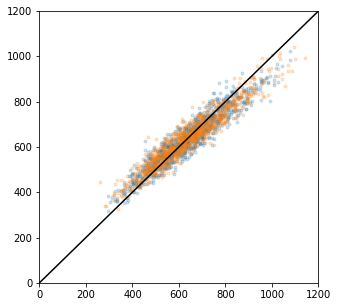

In [12]:
plt.figure(figsize=(5,5))
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.scatter(r1[3], r1[2], marker=".", alpha=0.2, label="train")
plt.scatter(r2[3], r2[2], marker=".", alpha=0.2, label="test")
plt.plot([0,1200], [0,1200], color="black")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


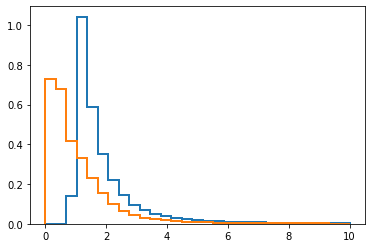

In [13]:
bins = np.linspace(0,10,30)
plt.hist([c[0] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[0] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


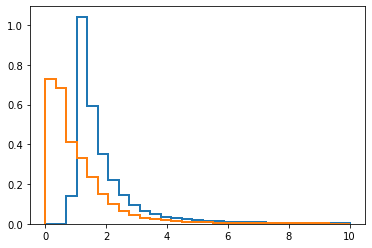

In [14]:
bins = np.linspace(0,10,30)
plt.hist([c[0] for c in r2[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[0] for c in r2[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


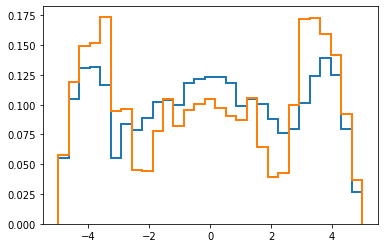

In [16]:
bins = np.linspace(-5, 5, 30)
plt.hist([c[1] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[1] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


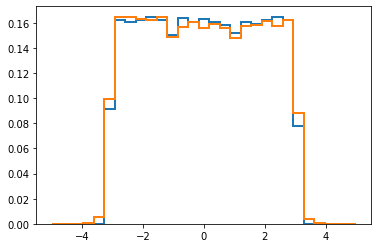

In [17]:
bins = np.linspace(-5,5,30)
plt.hist([c[2] for c in r1[1]], bins=bins, histtype="step", lw=2, normed=True);
plt.hist([c[2] for c in r1[0]], bins=bins, histtype="step", lw=2, normed=True);

Text(0.5, 1.0, 'predicted')

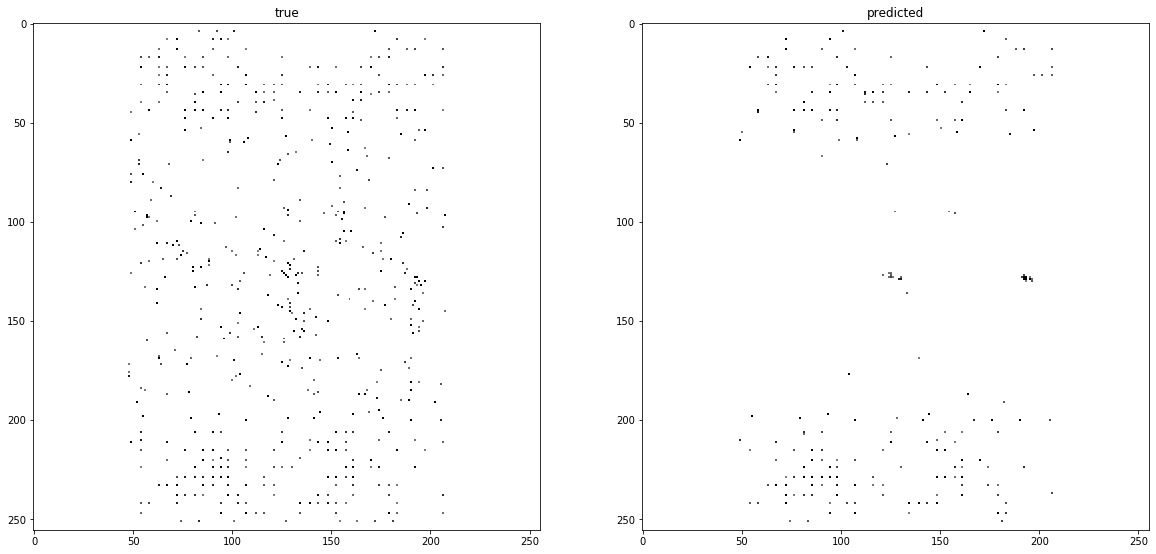

In [22]:
iev = 4
pp = pred2[iev, :, :, 0]
pp[pp<1] = 0

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(50*data_images_out[8000+iev, :, :, 0], cmap="binary", interpolation=None, vmin=0, vmax=100)
plt.title("true")

plt.subplot(1,2,2)
plt.imshow(50*pp, cmap="binary", interpolation=None, vmin=0, vmax=100)
plt.title("predicted")